In [1]:
%run final_full_data_transformation_process.ipynb

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_dev.shape, y_dev.shape)

(23924, 50) (23924,) (7477, 50) (7477,) (5981, 50) (5981,)


# Models

In [2]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [3]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=5, tol=None, random_state=42,
                   loss="perceptron", eta0=1, learning_rate="constant", penalty=None)
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='perceptron',
       max_iter=5, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty=None, power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [4]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() 
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [5]:
from sklearn.kernel_approximation import RBFSampler

rbf_features = RBFSampler(gamma=1, random_state=42)

X_train_features = rbf_features.fit_transform(X_train)

sgd_rbf = SGDClassifier(max_iter=5, random_state=42, loss="perceptron", 
                        eta0=1, learning_rate="constant", penalty=None)

sgd_rbf.fit(X_train_features, y_train) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='perceptron',
       max_iter=5, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty=None, power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

# Evaluation

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def print_complete_evaluation_statistics(model,X_train,y_train,do_roc):
    accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy"))
    
    y_train_predictions = cross_val_predict(model, X_train, y_train, cv=5)
    
    conf_matrix = confusion_matrix(y_train, y_train_predictions)
    precision = precision_score(y_train, y_train_predictions)
    recall = recall_score(y_train, y_train_predictions)
    f1 = f1_score(y_train, y_train_predictions)
    
    if do_roc:
        y_scores = cross_val_predict(model, X_train, y_train, cv=5, method="decision_function")
        roc_score = roc_auc_score(y_train, y_scores)
    
    
    print("Accuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}".format(accuracy,precision,recall,f1))
    if do_roc:
        print("ROC (AUC) Score: {}".format(roc_score))
    print("Confusion Matrix:")
    print("{}".format(conf_matrix))

In [7]:
print_complete_evaluation_statistics(log_reg,X_train,y_train,True)

Accuracy: 0.8853033186204099
Precision: 0.8327338129496403
Recall: 0.8180212014134276
F1: 0.8253119429590019
ROC (AUC) Score: 0.9479730880868248
Confusion Matrix:
[[14698  1302]
 [ 1442  6482]]


In [8]:
print_complete_evaluation_statistics(sgd,X_train,y_train,True)

Accuracy: 0.8335149121243575
Precision: 0.8138238573021181
Recall: 0.6448763250883393
F1: 0.7195662888122228
ROC (AUC) Score: 0.9046561553508328
Confusion Matrix:
[[14831  1169]
 [ 2814  5110]]


In [9]:
print_complete_evaluation_statistics(gnb,X_train,y_train,False)

Accuracy: 0.6756819579720629
Precision: 0.5054237065281704
Recall: 0.9702170620898536
F1: 0.6646207045601902
Confusion Matrix:
[[8477 7523]
 [ 236 7688]]


In [10]:
accuracy = sgd_rbf.score(X_train_features, y_train)
y_train_pred = cross_val_predict(sgd, X_train, y_train, cv=5)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
print(accuracy, precision, recall, f1)
print_complete_evaluation_statistics(sgd_rbf,X_train_features,y_train,True)

0.6557849857883297 0.8138238573021181 0.6448763250883393 0.7195662888122228
Accuracy: 0.573273782689075
Precision: 0.3808282048607489
Recall: 0.46075214538112064
F1: 0.4169950316943636
ROC (AUC) Score: 0.5604448116481575
Confusion Matrix:
[[10064  5936]
 [ 4273  3651]]


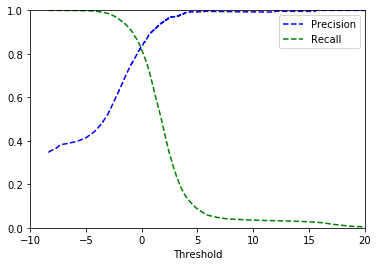

In [11]:
# precision-recall curve for log_reg
y_scores = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")
roc_score = roc_auc_score(y_train, y_scores)

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
  
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_pr_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0, 1])
    plt.xlim([-10,20])
    
plot_pr_vs_threshold(precisions, recalls, thresholds)
plt.show()


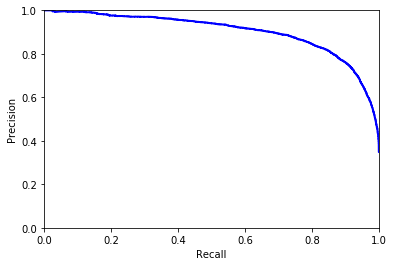

In [12]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])

plot_precision_vs_recall(precisions, recalls)
plt.show()

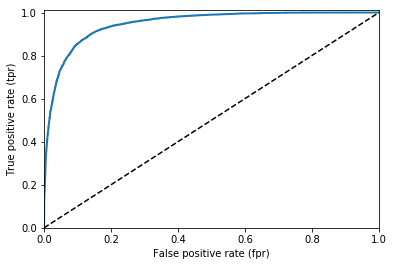

In [13]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1.01])
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    
plot_roc_curve(fpr, tpr)
plt.show()

# Neural Network

In [14]:
import tensorflow as tf
import time

In [15]:
def get_accuracy(predictions,target):
    count_correct = 0
    total = len(predictions)
    for i in range(len(predictions)):
        p = predictions[i]
        t = target[i]
        if p == t: 
            count_correct += 1
    accuracy = round(count_correct/total,7)*100
    return accuracy

In [16]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 50], name="x")
target = tf.placeholder(tf.int32, [None], name="target")
learning_rate = tf.placeholder(tf.float32, name="learning_rate")

hidden_layer_size = 100
lr = 0.5
epochs = 500

hidden = tf.layers.dense(x, hidden_layer_size, activation=tf.tanh)
output = tf.layers.dense(hidden, 2, activation=None) # changed to 2 because of 2 possible classes

probabilities = tf.nn.softmax(output)
predictions = tf.argmax(probabilities, axis=1)
loss_ = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=output, labels=target)
loss = tf.reduce_mean(loss_)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss)

data_x = X_train
data_targets = y_train.tolist()
print("Hidden Layer Size: {}".format(hidden_layer_size))
print("Learning Rate: {}".format(lr))
print("Total Epochs: {}".format(epochs))
start_time = time.time()
tf.set_random_seed(20)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        result, _ = sess.run([predictions, train_op], feed_dict={x: data_x, target: data_targets, learning_rate: lr})
        if epoch % 10 == 0:
            print("Accuracy after epoch {} = {}%".format(epoch,get_accuracy(result,data_targets)))
end_time = time.time()
print("Time taken = {} seconds".format(round(end_time-start_time,5)))

Hidden Layer Size: 100
Learning Rate: 0.5
Total Epochs: 500
Accuracy after epoch 0 = 38.48855%
Accuracy after epoch 10 = 87.105%
Accuracy after epoch 20 = 87.89918%
Accuracy after epoch 30 = 88.30462999999999%
Accuracy after epoch 40 = 88.48019000000001%
Accuracy after epoch 50 = 88.5805%
Accuracy after epoch 60 = 88.6223%
Accuracy after epoch 70 = 88.68918000000001%
Accuracy after epoch 80 = 88.7268%
Accuracy after epoch 90 = 88.79786%
Accuracy after epoch 100 = 88.83548%
Accuracy after epoch 110 = 88.88146%
Accuracy after epoch 120 = 88.90654%
Accuracy after epoch 130 = 88.93997999999999%
Accuracy after epoch 140 = 88.94416000000001%
Accuracy after epoch 150 = 88.9985%
Accuracy after epoch 160 = 89.01103%
Accuracy after epoch 170 = 89.03611000000001%
Accuracy after epoch 180 = 89.01521%
Accuracy after epoch 190 = 89.06954999999999%
Accuracy after epoch 200 = 89.10299%
Accuracy after epoch 210 = 89.11552999999999%
Accuracy after epoch 220 = 89.15733%
Accuracy after epoch 230 = 89.1949

In [17]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 50], name="x")
target = tf.placeholder(tf.int32, [None], name="target")
learning_rate = tf.placeholder(tf.float32, name="learning_rate")

hidden_layer_size = 50
lr = 1.5
epochs = 200

hidden = tf.layers.dense(x, hidden_layer_size, activation=tf.tanh)
output = tf.layers.dense(hidden, 2, activation=None) # changed to 2 because of 2 possible classes

probabilities = tf.nn.softmax(output)
predictions = tf.argmax(probabilities, axis=1)
loss_ = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=output, labels=target)
loss = tf.reduce_mean(loss_)

optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss)

data_x = X_train
data_targets = y_train.tolist()
print("Hidden Layer Size: {}".format(hidden_layer_size))
print("Learning Rate: {}".format(lr))
print("Total Epochs: {}".format(epochs))
start_time = time.time()
tf.set_random_seed(20)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        result, _ = sess.run([predictions, train_op], feed_dict={x: data_x, target: data_targets, learning_rate: lr})
        if epoch % 10 == 0:
            print("Accuracy after epoch {} = {}%".format(epoch,get_accuracy(result,data_targets)))
end_time = time.time()
print("Time taken = {} seconds".format(round(end_time-start_time,5)))

Hidden Layer Size: 50
Learning Rate: 1.5
Total Epochs: 200
Accuracy after epoch 0 = 50.622809999999994%
Accuracy after epoch 10 = 66.74887000000001%
Accuracy after epoch 20 = 75.30512999999999%
Accuracy after epoch 30 = 81.60007%
Accuracy after epoch 40 = 84.02441%
Accuracy after epoch 50 = 85.52082%
Accuracy after epoch 60 = 86.54489%
Accuracy after epoch 70 = 87.25547999999999%
Accuracy after epoch 80 = 87.58987%
Accuracy after epoch 90 = 87.895%
Accuracy after epoch 100 = 88.07892000000001%
Accuracy after epoch 110 = 88.22521%
Accuracy after epoch 120 = 88.37568999999999%
Accuracy after epoch 130 = 88.47601%
Accuracy after epoch 140 = 88.50945%
Accuracy after epoch 150 = 88.58468%
Accuracy after epoch 160 = 88.65155999999999%
Accuracy after epoch 170 = 88.69336%
Accuracy after epoch 180 = 88.70172%
Accuracy after epoch 190 = 88.73516000000001%
Time taken = 7.55276 seconds


In [18]:
# BEST SO FAR

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 50], name="x")
target = tf.placeholder(tf.int32, [None], name="target")
learning_rate = tf.placeholder(tf.float32, name="learning_rate")

hidden_layer_size = 50
lr = 0.1
epochs = 500

hidden = tf.layers.dense(x, hidden_layer_size, activation=tf.tanh)
output = tf.layers.dense(hidden, 2, activation=None) # changed to 2 because of 2 possible classes

probabilities = tf.nn.softmax(output)
predictions = tf.argmax(probabilities, axis=1)
loss_ = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=output, labels=target)
loss = tf.reduce_mean(loss_)

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss)

data_x = X_train
data_targets = y_train.tolist()
print("Hidden Layer Size: {}".format(hidden_layer_size))
print("Learning Rate: {}".format(lr))
print("Total Epochs: {}".format(epochs))
start_time = time.time()
tf.set_random_seed(20)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        result, _ = sess.run([predictions, train_op], feed_dict={x: data_x, target: data_targets, learning_rate: lr})
        if epoch % 10 == 0:
            print("Accuracy after epoch {} = {}%".format(epoch,get_accuracy(result,data_targets)))
    result_dev, _ = sess.run([predictions, train_op], feed_dict={x: X_dev, target: y_dev, learning_rate: lr})
    print("Accuracy on dev set: {}".format(get_accuracy(result_dev,y_dev.tolist())))
end_time = time.time()
print("Time taken = {} seconds".format(round(end_time-start_time,5)))

Hidden Layer Size: 50
Learning Rate: 0.1
Total Epochs: 500
Accuracy after epoch 0 = 52.34075%
Accuracy after epoch 10 = 87.42267%
Accuracy after epoch 20 = 88.71426%
Accuracy after epoch 30 = 88.76024%
Accuracy after epoch 40 = 89.25765%
Accuracy after epoch 50 = 89.42067%
Accuracy after epoch 60 = 89.55024%
Accuracy after epoch 70 = 89.61712%
Accuracy after epoch 80 = 89.7885%
Accuracy after epoch 90 = 89.88880999999999%
Accuracy after epoch 100 = 89.95151%
Accuracy after epoch 110 = 90.08527%
Accuracy after epoch 120 = 90.20648999999999%
Accuracy after epoch 130 = 90.38622%
Accuracy after epoch 140 = 90.44892%
Accuracy after epoch 150 = 90.54924%
Accuracy after epoch 160 = 90.69554%
Accuracy after epoch 170 = 90.83347%
Accuracy after epoch 180 = 87.99531999999999%
Accuracy after epoch 190 = 89.29527%
Accuracy after epoch 200 = 90.3486%
Accuracy after epoch 210 = 90.85019%
Accuracy after epoch 220 = 91.05919%
Accuracy after epoch 230 = 91.2431%
Accuracy after epoch 240 = 91.41448%
Acc

In [19]:
# BEST SO FAR

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 50], name="x")
target = tf.placeholder(tf.int32, [None], name="target")
learning_rate = tf.placeholder(tf.float32, name="learning_rate")

hidden_layer_size = 100
lr = 0.1
epochs = 100

hidden = tf.layers.dense(x, hidden_layer_size, activation=tf.tanh)
output = tf.layers.dense(hidden, 2, activation=None) # changed to 2 because of 2 possible classes

probabilities = tf.nn.softmax(output)
predictions = tf.argmax(probabilities, axis=1)
loss_ = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=output, labels=target)
loss = tf.reduce_mean(loss_)

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss)

data_x = X_train
data_targets = y_train.tolist()
print("Hidden Layer Size: {}".format(hidden_layer_size))
print("Learning Rate: {}".format(lr))
print("Total Epochs: {}".format(epochs))
start_time = time.time()
tf.set_random_seed(20)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        result, _ = sess.run([predictions, train_op], feed_dict={x: data_x, target: data_targets, learning_rate: lr})
        if epoch % 10 == 0:
            print("Accuracy after epoch {} = {}%".format(epoch,get_accuracy(result,data_targets)))
    result_dev, _ = sess.run([predictions, train_op], feed_dict={x: X_dev, target: y_dev, learning_rate: lr})
    print("Accuracy on dev set: {}".format(get_accuracy(result_dev,y_dev.tolist())))
end_time = time.time()
print("Time taken = {} seconds".format(round(end_time-start_time,5)))

Hidden Layer Size: 100
Learning Rate: 0.1
Total Epochs: 100
Accuracy after epoch 0 = 53.01371%
Accuracy after epoch 10 = 88.01204%
Accuracy after epoch 20 = 87.93262%
Accuracy after epoch 30 = 88.30462999999999%
Accuracy after epoch 40 = 88.92326%
Accuracy after epoch 50 = 89.30781%
Accuracy after epoch 60 = 89.42903%
Accuracy after epoch 70 = 89.5586%
Accuracy after epoch 80 = 89.73834000000001%
Accuracy after epoch 90 = 89.8094%
Accuracy on dev set: 89.83448
Time taken = 5.31064 seconds


In [20]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 50], name="x")
target = tf.placeholder(tf.int32, [None], name="target")
learning_rate = tf.placeholder(tf.float32, name="learning_rate")
prob = tf.placeholder_with_default(1.0, shape=())

hidden_layer_size = 100
lr = 0.1
epochs = 100
keep_prob = 0.5

hidden = tf.layers.dense(x, hidden_layer_size, activation=tf.tanh)
output = tf.layers.dense(hidden, 2, activation=None) # changed to 2 because of 2 possible classes
layer = tf.nn.dropout(output, prob)

probabilities = tf.nn.softmax(layer)
predictions = tf.argmax(probabilities, axis=1)
loss_ = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=output, labels=target)
loss = tf.reduce_mean(loss_)

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss)

data_x = X_train
data_targets = y_train.tolist()
print("Hidden Layer Size: {}".format(hidden_layer_size))
print("Learning Rate: {}".format(lr))
print("Total Epochs: {}".format(epochs))
start_time = time.time()
test_set_predictions = []
tf.set_random_seed(20)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        result, _ = sess.run([predictions, train_op], feed_dict={x: data_x, target: data_targets, learning_rate: lr, prob: keep_prob})
        if epoch % 10 == 0:
            print("Accuracy after epoch {} = {}%".format(epoch,get_accuracy(result,data_targets)))
    tf.set_random_seed(30)
    result_dev, _ = sess.run([predictions, train_op], feed_dict={x: X_dev, target: y_dev, learning_rate: lr})
    print("Accuracy on dev set: {}".format(get_accuracy(result_dev,y_dev.tolist())))
    result_test, _ = sess.run([predictions, train_op], feed_dict={x: X_test, target: y_test, learning_rate: lr})
    print("Accuracy on test set: {}".format(get_accuracy(result_test,y_test.tolist())))
    test_set_predictions = result_test
end_time = time.time()
print("Time taken = {} seconds".format(round(end_time-start_time,5)))

Hidden Layer Size: 100
Learning Rate: 0.1
Total Epochs: 100
Accuracy after epoch 0 = 64.88045%
Accuracy after epoch 10 = 81.78398%
Accuracy after epoch 20 = 76.8517%
Accuracy after epoch 30 = 77.67096%
Accuracy after epoch 40 = 77.4536%
Accuracy after epoch 50 = 76.78064%
Accuracy after epoch 60 = 77.67931999999999%
Accuracy after epoch 70 = 78.17673%
Accuracy after epoch 80 = 78.06805%
Accuracy after epoch 90 = 78.21435%
Accuracy on dev set: 89.7676
Accuracy on test set: 88.91267
Time taken = 5.77282 seconds


In [21]:
# the above disparity is due to dropout: the conditions for training and dev set predictions are different
# i.e we aren't throwing away activations
best_predictions = test_set_predictions
best_targets = y_test.tolist()
print(get_accuracy(best_predictions,best_targets))

88.91267


In [22]:
from sklearn.metrics import accuracy_score
def nn_evaluation(predictions,targets):
    accuracy = accuracy_score(targets, predictions)
    conf_matrix = confusion_matrix(targets, predictions)
    precision = precision_score(targets, predictions)
    recall = recall_score(targets, predictions)
    f1 = f1_score(targets, predictions)
    print("Accuracy: {}".format(accuracy))
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))
    print("F1: {}".format(f1))
    print("Confusion Matrix:")
    print("{}".format(conf_matrix))
nn_evaluation(best_predictions,best_targets)

Accuracy: 0.8891266550755651
Precision: 0.8309236947791164
Recall: 0.835284618490109
F1: 0.8330984497684719
Confusion Matrix:
[[4579  421]
 [ 408 2069]]
